<a href="https://colab.research.google.com/github/joannejuneie/Data-Preprocessing-in-Python/blob/main/Heat_flux_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import random as rnd
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# pip install -q keras

In [55]:

data_linear=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/April-June_22.csv")
df=pd.DataFrame(data_linear)
print(df.shape)

(1602047, 54)


In [19]:
to_drop=['MOULD_WATER_TEMP_BACK','MOULD_WATER_TEMP_NORTH', 'MOULD_WATER_TEMP_SOUTH','MOULD_WATER_BACK','MOULD_WATER_SOUTH','MOULD_WATER_NORTH','MOULD_BACK_HEATLOSS','MOULD_SOUTH_HEATLOSS','MOULD_NORTH_HEATLOSS']
df.drop(to_drop, inplace=True, axis=1)


In [20]:
print(df.shape)


(1602047, 45)


In [21]:
df.isnull().sum()

DATA_TIME                           0
CAP_OFF_MODE                        0
CAST_ID                             0
GRADE                               0
CARBON                              0
VANADIUM                         4852
TITANIUM                         4808
NIOBIUM                          4253
MANGANESE                           0
PHOSPHORUS                          0
SULPHUR                             0
SILICON                             0
TUNDISH_WEIGHT                      0
TUNDISH_TEMPERATURE                 0
CASTING_SPEED                       0
SLAB_WIDTH                          0
MOULD_LEVEL                         0
MOULD_WATER_FRONT                   0
MOULD_WATER_TEMP_FRONT              0
WATER_INLET_TEMP                    0
MOULD_FRONT_HEATLOSS                0
RING_NARROW_FACEA_WATER_FR_PV       0
RING_NARROW_FACEB_WATER_FR_PV       0
ZONE1A_WATER_FR_PV                  0
ZONE1B_WATER_FR_PV                  0
ZONE2_WATER_FR_PV                   0
ZONE3_WATER_

In [22]:
df.dropna(axis=0,inplace=True,how='any')

In [23]:
df.shape

(1597195, 45)

In [24]:
df.isnull().sum()

DATA_TIME                        0
CAP_OFF_MODE                     0
CAST_ID                          0
GRADE                            0
CARBON                           0
VANADIUM                         0
TITANIUM                         0
NIOBIUM                          0
MANGANESE                        0
PHOSPHORUS                       0
SULPHUR                          0
SILICON                          0
TUNDISH_WEIGHT                   0
TUNDISH_TEMPERATURE              0
CASTING_SPEED                    0
SLAB_WIDTH                       0
MOULD_LEVEL                      0
MOULD_WATER_FRONT                0
MOULD_WATER_TEMP_FRONT           0
WATER_INLET_TEMP                 0
MOULD_FRONT_HEATLOSS             0
RING_NARROW_FACEA_WATER_FR_PV    0
RING_NARROW_FACEB_WATER_FR_PV    0
ZONE1A_WATER_FR_PV               0
ZONE1B_WATER_FR_PV               0
ZONE2_WATER_FR_PV                0
ZONE3_WATER_FR_PV                0
ZONE4I_WATER_FR_PV               0
ZONE4O_WATER_FR_PV  

In [25]:
df.dropna(axis=0,inplace=True,how='any')

In [26]:
df.duplicated().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1602042    False
1602043    False
1602044    False
1602045    False
1602046    False
Length: 1597195, dtype: bool>

In [27]:
df.drop_duplicates()

,DATA_TIME,CAP_OFF_MODE,CAST_ID,GRADE,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,...,STOPPER_POSITION,AR_BACK_PRESSURE,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS
0,2022-03-27 09:44:57,0,74177,I17021,0.061,0.005,0.024,0.012,0.745,0.018,...,25.568,2.116,6.097,0.772,82.962,0.013,5.647,1.504,7.708,40.0
1,2022-03-27 09:45:02,0,74177,I17021,0.061,0.005,0.024,0.012,0.745,0.018,...,27.057,2.118,6.102,0.762,82.990,0.013,5.646,1.506,7.722,41.0
2,2022-03-27 09:45:07,0,74177,I17021,0.061,0.005,0.024,0.012,0.745,0.018,...,26.496,2.119,6.104,0.771,82.890,0.013,5.646,1.504,7.702,41.0
3,2022-03-27 09:45:12,0,74177,I17021,0.061,0.005,0.024,0.012,0.745,0.018,...,26.105,2.116,6.096,0.773,82.904,0.013,5.646,1.504,7.708,40.0
4,2022-03-27 09:45:17,0,74177,I17021,0.061,0.005,0.024,0.012,0.745,0.018,...,26.105,2.116,6.095,0.773,83.011,0.013,5.647,1.501,7.725,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602042,2022-06-29 05:59:34,0,80800,T01403,0.031,0.001,0.001,0.000,0.193,0.019,...,24.762,2.476,7.545,0.928,91.963,0.085,7.244,0.433,7.423,124.0
1602043,2022-06-29 05:59:39,0,80800,T01403,0.031,0.001,0.001,0.000,0.193,0.019,...,23.370,2.474,7.548,0.928,91.984,0.085,7.243,0.434,7.423,124.0
1602044,2022-06-29 05:59:44,0,80800,T01403,0.031,0.001,0.001,0.000,0.193,0.019,...,23.126,2.473,7.549,0.928,91.939,0.085,7.243,0.434,7.423,125.0
1602045,2022-06-29 05:59:49,0,80800,T01403,0.031,0.001,0.001,0.000,0.193,0.019,...,24.811,2.473,7.549,0.929,91.941,0.085,7.244,0.431,7.423,124.0


In [28]:
df.dtypes

DATA_TIME                         object
CAP_OFF_MODE                       int64
CAST_ID                            int64
GRADE                             object
CARBON                           float64
VANADIUM                         float64
TITANIUM                         float64
NIOBIUM                          float64
MANGANESE                        float64
PHOSPHORUS                       float64
SULPHUR                          float64
SILICON                          float64
TUNDISH_WEIGHT                   float64
TUNDISH_TEMPERATURE              float64
CASTING_SPEED                    float64
SLAB_WIDTH                       float64
MOULD_LEVEL                      float64
MOULD_WATER_FRONT                float64
MOULD_WATER_TEMP_FRONT           float64
WATER_INLET_TEMP                 float64
MOULD_FRONT_HEATLOSS             float64
RING_NARROW_FACEA_WATER_FR_PV    float64
RING_NARROW_FACEB_WATER_FR_PV    float64
ZONE1A_WATER_FR_PV               float64
ZONE1B_WATER_FR_

In [29]:
to_drop=['DATA_TIME','GRADE']
df.drop(to_drop, inplace=True, axis=1)

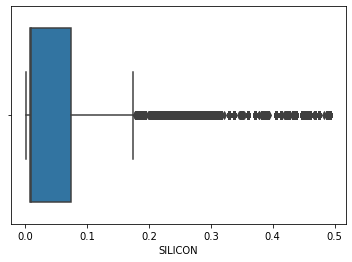

In [30]:
sns.boxplot(x=df['SILICON'])

In [31]:
from scipy import stats
import numpy as np


In [32]:
from scipy.stats import zscore
zscore_frame = df.apply(zscore)
zscore_frame

,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION,AR_BACK_PRESSURE,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS
0,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.193981,-0.054226,-0.002864,-0.047362,0.165273,-0.692477,-0.132861,2.062123,0.311353,-0.878499
1,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.350927,-0.051121,-0.000744,-0.072846,0.166345,-0.692477,-0.133351,2.067894,0.316908,-0.861679
2,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.291795,-0.049568,0.000105,-0.049911,0.162516,-0.692477,-0.133351,2.062123,0.308972,-0.861679
3,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.250583,-0.054226,-0.003289,-0.044814,0.163052,-0.692477,-0.133351,2.062123,0.311353,-0.878499
4,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.250583,-0.054226,-0.003713,-0.044814,0.167149,-0.692477,-0.132861,2.053466,0.318098,-0.861679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602042,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,0.109025,0.504672,0.611314,0.350177,0.509864,-0.414314,0.648359,-1.028441,0.198271,0.534341
1602043,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,-0.037697,0.501567,0.612586,0.350177,0.510668,-0.414314,0.647870,-1.025556,0.198271,0.534341
1602044,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,-0.063415,0.500015,0.613011,0.350177,0.508945,-0.414314,0.647870,-1.025556,0.198271,0.551160
1602045,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,0.114190,0.500015,0.613011,0.352726,0.509022,-0.414314,0.648359,-1.034213,0.198271,0.534341


In [33]:

for col in df:
    if col.endswith('zscore'):
        df.drop(col, inplace=True, axis=1)   

In [34]:
# for col in df:
#     col_zscore = col + '_zscore'
#     df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [35]:
df


,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION,AR_BACK_PRESSURE,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS
0,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,25.568,2.116,6.097,0.772,82.962,0.013,5.647,1.504,7.708,40.0
1,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,27.057,2.118,6.102,0.762,82.990,0.013,5.646,1.506,7.722,41.0
2,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,26.496,2.119,6.104,0.771,82.890,0.013,5.646,1.504,7.702,41.0
3,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,26.105,2.116,6.096,0.773,82.904,0.013,5.646,1.504,7.708,40.0
4,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,26.105,2.116,6.095,0.773,83.011,0.013,5.647,1.501,7.725,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602042,0,80800,0.031,0.001,0.001,0.000,0.193,0.019,0.010,0.013,...,24.762,2.476,7.545,0.928,91.963,0.085,7.244,0.433,7.423,124.0
1602043,0,80800,0.031,0.001,0.001,0.000,0.193,0.019,0.010,0.013,...,23.370,2.474,7.548,0.928,91.984,0.085,7.243,0.434,7.423,124.0
1602044,0,80800,0.031,0.001,0.001,0.000,0.193,0.019,0.010,0.013,...,23.126,2.473,7.549,0.928,91.939,0.085,7.243,0.434,7.423,125.0
1602045,0,80800,0.031,0.001,0.001,0.000,0.193,0.019,0.010,0.013,...,24.811,2.473,7.549,0.929,91.941,0.085,7.244,0.431,7.423,124.0


In [36]:
from scipy import stats
zscore_removed= zscore_frame[(np.abs(stats.zscore(zscore_frame)) < 3).all(axis=1)]
zscore_removed

,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION,AR_BACK_PRESSURE,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS
0,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.193981,-0.054226,-0.002864,-0.047362,0.165273,-0.692477,-0.132861,2.062123,0.311353,-0.878499
1,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.350927,-0.051121,-0.000744,-0.072846,0.166345,-0.692477,-0.133351,2.067894,0.316908,-0.861679
2,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.291795,-0.049568,0.000105,-0.049911,0.162516,-0.692477,-0.133351,2.062123,0.308972,-0.861679
3,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.250583,-0.054226,-0.003289,-0.044814,0.163052,-0.692477,-0.133351,2.062123,0.311353,-0.878499
4,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.250583,-0.054226,-0.003713,-0.044814,0.167149,-0.692477,-0.132861,2.053466,0.318098,-0.861679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602042,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,0.109025,0.504672,0.611314,0.350177,0.509864,-0.414314,0.648359,-1.028441,0.198271,0.534341
1602043,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,-0.037697,0.501567,0.612586,0.350177,0.510668,-0.414314,0.647870,-1.025556,0.198271,0.534341
1602044,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,-0.063415,0.500015,0.613011,0.350177,0.508945,-0.414314,0.647870,-1.025556,0.198271,0.551160
1602045,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,0.114190,0.500015,0.613011,0.352726,0.509022,-0.414314,0.648359,-1.034213,0.198271,0.534341


In [37]:
from scipy import stats
zscore_removed[(np.abs(stats.zscore(zscore_frame)) > 3).all(axis=1)]
# all zscore values greater than 3 removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION,AR_BACK_PRESSURE,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS


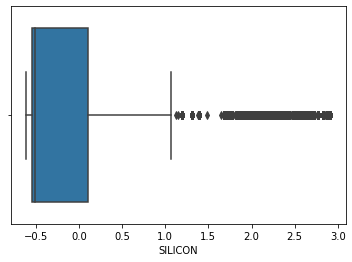

In [38]:
sns.boxplot(x=zscore_removed['SILICON'])


In [39]:
Y = zscore_removed['MOULD_FRONT_HEATLOSS']
X = zscore_removed.drop('MOULD_FRONT_HEATLOSS', axis=1)

In [40]:
print(X)

         CAP_OFF_MODE   CAST_ID    CARBON  VANADIUM  TITANIUM   NIOBIUM  \
0           -0.237879 -1.635359 -0.309795  0.118613  2.324577  0.419442   
1           -0.237879 -1.635359 -0.309795  0.118613  2.324577  0.419442   
2           -0.237879 -1.635359 -0.309795  0.118613  2.324577  0.419442   
3           -0.237879 -1.635359 -0.309795  0.118613  2.324577  0.419442   
4           -0.237879 -1.635359 -0.309795  0.118613  2.324577  0.419442   
...               ...       ...       ...       ...       ...       ...   
1602042     -0.237879  1.670116 -0.530790 -0.350943 -0.348699 -0.646761   
1602043     -0.237879  1.670116 -0.530790 -0.350943 -0.348699 -0.646761   
1602044     -0.237879  1.670116 -0.530790 -0.350943 -0.348699 -0.646761   
1602045     -0.237879  1.670116 -0.530790 -0.350943 -0.348699 -0.646761   
1602046     -0.237879  1.670116 -0.530790 -0.350943 -0.348699 -0.646761   

         MANGANESE  PHOSPHORUS   SULPHUR   SILICON  ...  STOPPER_POSITION  \
0         0.075422   -

In [41]:
# Dependent or Target Variable

Y.head()

0    0.806190
1    0.781250
2    0.782702
3    0.758489
4    0.773743
Name: MOULD_FRONT_HEATLOSS, dtype: float64

In [42]:
# Splitting dataset into 80% Training and 20% Testing Data:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

In [43]:
from sklearn.linear_model import LinearRegression
ml= LinearRegression()


In [44]:
X_train

,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION,AR_BACK_PRESSURE,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS
306004,-0.237879,-1.000516,-0.383460,-0.233554,-0.464928,-0.646761,-0.796726,0.195406,-0.948466,-0.547221,...,-0.591066,0.495357,-0.026193,0.819071,0.704230,-0.221145,-0.175420,0.697196,-0.312779,1.005287
1194292,-0.237879,0.816173,0.198492,0.118613,-0.348699,1.307945,1.665811,0.195406,-0.948466,2.248153,...,0.688113,0.509330,-0.181010,0.576979,0.704230,0.246324,-0.646500,-0.006910,-0.085822,0.282048
75453,-0.237879,-1.463672,-0.272963,-0.350943,-0.464928,0.419442,-0.537512,0.706757,-0.480442,-0.547221,...,-0.135511,0.489147,0.322463,0.120827,0.242491,-0.031839,0.369526,0.829937,0.603778,0.786633
1162728,-0.237879,0.756282,-0.206665,-0.233554,-0.464928,-0.646761,-0.772425,0.323244,0.923632,-0.558493,...,-0.699210,0.641292,0.467949,-0.467837,-0.252134,-0.078200,0.833269,1.095420,0.146690,0.567980
1257159,-0.237879,0.954920,0.198492,0.118613,-0.348699,1.219094,1.695513,0.706757,-0.012417,2.124164,...,0.181122,0.490700,1.284874,-0.049911,0.111944,-0.514762,1.055357,1.233932,1.380670,0.803453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444798,-0.237879,-0.695572,-0.420293,0.001224,1.859659,0.241742,0.159127,-0.571622,-0.480442,0.072721,...,0.860659,-0.007651,-0.352793,-0.218101,0.349379,-0.696341,0.015360,0.232601,0.176051,-0.659845
167590,-0.237879,-1.274018,-0.110901,-0.233554,-0.464928,-0.646761,-0.753524,-0.188108,-0.012417,-0.569764,...,-0.779001,0.554352,-0.452894,0.584624,0.547574,0.667433,-0.446426,-0.006910,-0.996428,0.231589
1230871,-0.237879,0.895029,0.051162,-0.350943,-0.464928,-0.646761,0.809864,0.195406,0.923632,0.061449,...,0.415328,0.489147,0.222363,0.523464,0.609976,-0.472265,0.326968,-0.670617,-0.221520,0.282048
132448,-0.237879,-1.339398,-0.493957,-0.350943,-0.464928,-0.646761,-1.309755,0.578919,-0.480442,-0.524678,...,0.317514,-0.069750,0.390753,-0.141651,0.592672,0.404723,0.462471,0.290315,-0.071141,-0.643026


In [45]:
ml.fit(X_train,Y_train)

LinearRegression()

In [46]:
y_pred=ml.predict(X_test)
print(y_pred)

[ 0.36389292  0.60636292  0.6663052  ... -0.75674284  0.77035857
  0.60007517]


In [47]:
ml.predict([[0.0000 , 74177.0000, 0.0610 , 0.0050 ,0.0240 ,0.0120,0.7450,0.0180, 0.0050, 0.0630,32.2000, 1547.0000,1.4010, 1335.0000,29.2500,4015.7570,  48.2481, 40.5313, 78.6914,480.0790, 1371.8450,1482.2270,713.4474,408.6703,697.5551,60.1044,182.6218, 0.2272, 1397.0000,255836.0000,5189.0040,166.0000,25.5680, 2.1160,6.0970,0.7720,82.9620,0.0130, 5.6470,1.5040, 7.7080,40.0000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([2188.89234352])

In [48]:
row_1=zscore_removed.iloc[0]

In [49]:
row_1


CAP_OFF_MODE                    -0.237879
CAST_ID                         -1.635359
CARBON                          -0.309795
VANADIUM                         0.118613
TITANIUM                         2.324577
NIOBIUM                          0.419442
MANGANESE                        0.075422
PHOSPHORUS                      -0.060270
SULPHUR                         -0.480442
SILICON                          0.083992
TUNDISH_WEIGHT                   0.571650
TUNDISH_TEMPERATURE             -0.305677
CASTING_SPEED                    0.723136
SLAB_WIDTH                       0.390697
MOULD_LEVEL                      0.441601
MOULD_WATER_FRONT                0.788963
MOULD_WATER_TEMP_FRONT           0.276476
WATER_INLET_TEMP                 0.086773
MOULD_FRONT_HEATLOSS             0.806190
RING_NARROW_FACEA_WATER_FR_PV    1.009009
RING_NARROW_FACEB_WATER_FR_PV    1.138410
ZONE1A_WATER_FR_PV               1.814132
ZONE1B_WATER_FR_PV               1.776376
ZONE2_WATER_FR_PV                0

In [50]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.9772832740660773

Text(0.5, 1.0, 'Actual vs. Predicted')

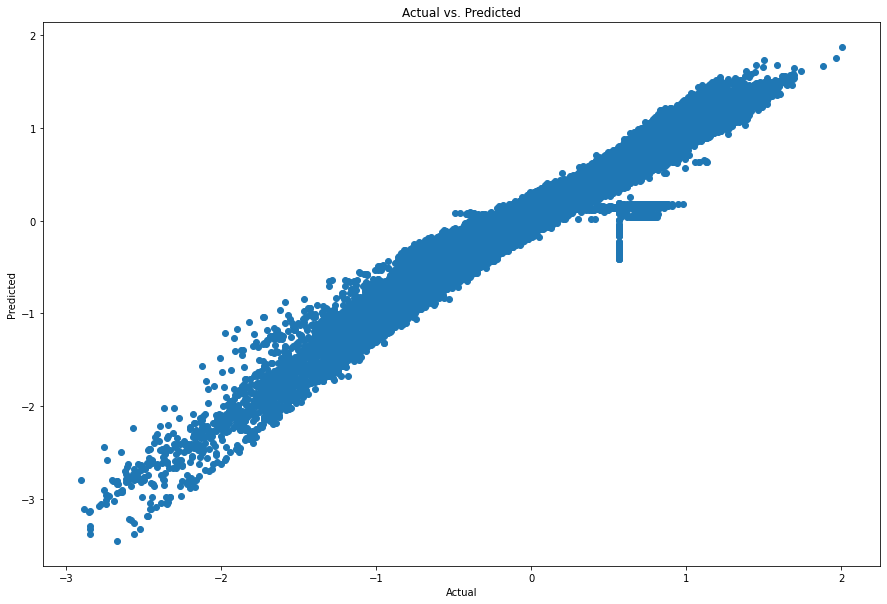

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')